# <div align="center">Text Analysis With NLTK</div>

##### <div align="center"> Import libraries</div>

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize # spliting string into substrings
from nltk.corpus import stopwords # for removing stop words
from nltk import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from nltk import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree
import string, re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_colwidth', -1)

Read data to pandas dataframe

In [4]:
df=pd.read_csv('./datasets/spam.csv')

##### <div align="center">Inspect Data</div>

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.isnull().sum()

v1            0   
v2            0   
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Remove unused columns

In [9]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [11]:
df.columns=['target','text']

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Number of text in each target

In [13]:
df.groupby(['target'])['target'].count()

target
ham     4825
spam    747 
Name: target, dtype: int64

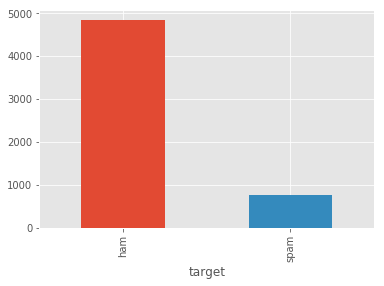

In [14]:
df.groupby(['target'])['target'].count().plot(kind='bar')

In [15]:
df.groupby(['target'])['target'].count()/df['target'].count() *100

target
ham     86.593683
spam    13.406317
Name: target, dtype: float64

In [16]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


##### <div align="center">Remove punctation</div>

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [19]:
df['text_without_punctuations']=df['text'].apply(lambda x: remove_punctuation(x))

In [20]:
df.head()

,target,text,text_without_punctuations
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


##### <div align="center">Convert the text into lower case</div>

In [21]:
def convert_to_lower_case(text):
    return "".join([t.lower() for t in text])

In [22]:
df['text_in_lower_case']=df['text_without_punctuations'].apply(lambda x: convert_to_lower_case(x))

df.head()

##### <div align="center">Tokenize text into words</div>

In [23]:
def text_tokenizaion(text):
    return re.split(' ',text)

In [24]:
df['tokenized_text']=df['text_in_lower_case'].apply(lambda x: text_tokenizaion(x))

In [25]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


##### <div align="center">Remove stop words</div>

In [26]:
stopwords.words("english")[0:5]

['i', 'me', 'my', 'myself', 'we']

In [27]:
def remove_stopwords(text):
    return [w for w in text if w not in stopwords.words('english')]

In [28]:
df['text_without_stopwords']=df['tokenized_text'].apply(lambda x:remove_stopwords(x))

In [29]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


##### <div align="center">Normalize text with lemmatization</div>

In [30]:
def text_lematization(text):
    return [WordNetLemmatizer().lemmatize(w) for w in text]

In [31]:
df['lemmatized_text']=df['text_without_stopwords'].apply(lambda x: text_lematization(x))

In [32]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


##### <div align="center">Total words</div>

In [33]:
text_list=[]  
for index, row in df.iterrows(): 
    text_list.append(" ".join(row['lemmatized_text'])) 
text_list

total_words=' '.join(text_list)
total_words=word_tokenize(total_words)
# print(total_words)

##### <div align="center">Frequent Words</div>

In [34]:
freq_words=FreqDist(total_words)
freq_words

FreqDist({'u': 1182, 'call': 600, '2': 478, 'im': 462, 'get': 397, 'ur': 384, 'go': 304, '4': 287, 'dont': 279, 'ok': 277, ...})

Frequent Word Count

In [35]:
unique_words=len(freq_words)
unique_words

8899

In [36]:
df['text_in_lower_case'].head()

0    go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat                                               
1    ok lar joking wif u oni                                                                                                                              
2    free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3    u dun say so early hor u c already then say                                                                                                          
4    nah i dont think he goes to usf he lives around here though                                                                                          
Name: text_in_lower_case, dtype: object

In [37]:
word_frequency=FreqDist(freq_words)
word_frequency

FreqDist({'u': 1182, 'call': 600, '2': 478, 'im': 462, 'get': 397, 'ur': 384, 'go': 304, '4': 287, 'dont': 279, 'ok': 277, ...})

##### <div align="center">Most common words used</div>

In [38]:
word_frequency.most_common(5)

[('u', 1182), ('call', 600), ('2', 478), ('im', 462), ('get', 397)]

Visualize most common words

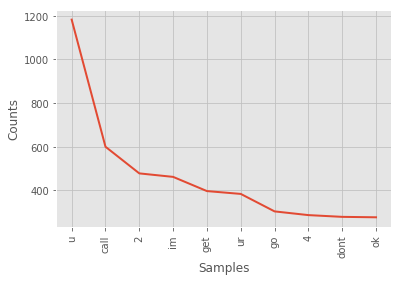

In [39]:
word_frequency.plot(10)
plt.show()

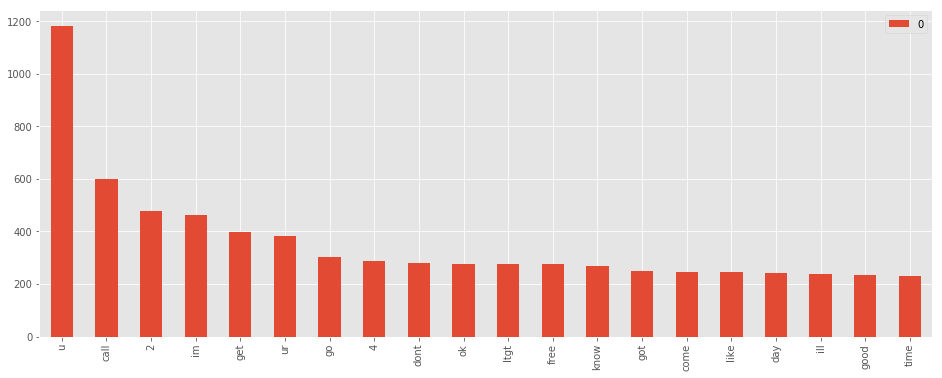

In [40]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6))

##### <div align="center">Part-of-SPeech Tagging (POS)<div>

Count POS Tags

In [41]:
# POS Tagging
tags=pos_tag(total_words)
print(tags[0:10])

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN')]


In [42]:
counter=Counter(tag for word,tag in tags)
print(counter)

Counter({'NN': 22708, 'JJ': 10427, 'CD': 3454, 'RB': 2787, 'VBP': 2541, 'VBD': 2074, 'VB': 1954, 'VBG': 1689, 'NNS': 1148, 'IN': 905, 'VBN': 717, 'NNP': 375, 'VBZ': 372, 'MD': 300, 'JJS': 137, 'DT': 135, 'FW': 118, 'TO': 89, 'RBR': 82, 'JJR': 80, 'PRP': 73, 'CC': 60, 'WP': 54, 'UH': 44, '$': 32, 'RP': 31, 'WRB': 20, 'WDT': 19, 'EX': 18, 'RBS': 5, 'SYM': 4, 'PDT': 3, 'WP$': 2})


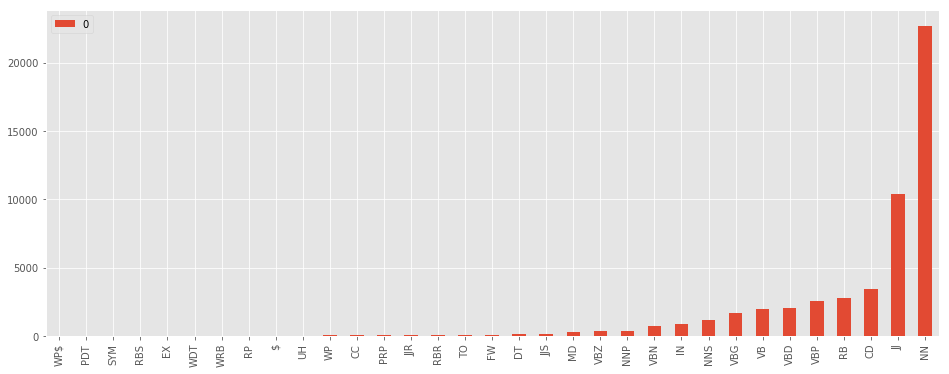

In [43]:
pd.DataFrame(counter,index=[0]).T.sort_values(by=[0],ascending=True).plot(kind='bar',figsize=(16,6))

##### <div align="center">Named Entity Recognition (NER) <div>
The default nltk class for NER defines Named entities as nouns whose words start with an initial Capital letter e.g India, Peter, IBM e.t.c. 

In [44]:
ne_entities=ne_chunk(tags)
print(ne_entities[0:100])

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ'), ('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('u', 'JJ'), ('oni', 'RB'), ('free', 'JJ'), ('entry', 'NN'), ('2', 'CD'), ('wkly', 'JJ'), ('comp', 'NN'), ('win', 'VBP'), ('fa', 'JJ'), ('cup', 'NN'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('2005', 'CD'), ('text', 'NN'), ('fa', 'NN'), ('87121', 'CD'), ('receive', 'JJ'), ('entry', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetcs', 'NN'), ('apply', 'VBP'), ('08452810075over18s', 'CD'), ('u', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('u', 'JJ'), ('c', 'NN'), ('already', 'RB'), ('say', 'VB'), ('nah', 'JJ'), ('dont', 'NN'), ('think', 'VBP'), ('go', 'VB'), ('usf', 'JJ'), ('life', 'NN'), ('around', 'IN'), ('though

In [45]:
ne_list = []
for subtree in ne_entities:
    if type(subtree) == Tree:
        ne_label = subtree.label()
        ne_string = " ".join([token for token, pos in subtree.leaves()])
        ne_list.append((ne_string, ne_label))
            
ne_list

[]

##### <div align="center">Document Term Matrix with CountVectorizer <div>

In [46]:
# Let's create a column with clean nromalized text
def clean_text(text):
    return " ".join(text)
df['clean_tokenized_text']=df['lemmatized_text'].apply(lambda x:clean_text(x))

In [47]:
vectorizer=CountVectorizer()
matrix=vectorizer.fit_transform(df['clean_tokenized_text'].head(5))

In [48]:
# Let's check the number of documents and terms returned
matrix.shape

(5, 51)

In [49]:
# Get the terms
print(vectorizer.get_feature_names())

['08452810075over18s', '2005', '21st', '87121', 'already', 'amore', 'apply', 'around', 'available', 'buffet', 'bugis', 'cine', 'comp', 'crazy', 'cup', 'dont', 'dun', 'early', 'entry', 'fa', 'final', 'free', 'go', 'got', 'great', 'hor', 'joking', 'jurong', 'la', 'lar', 'life', 'may', 'nah', 'ok', 'oni', 'point', 'questionstd', 'ratetcs', 'receive', 'say', 'text', 'think', 'though', 'tkts', 'txt', 'usf', 'wat', 'wif', 'win', 'wkly', 'world']


In [50]:
# get the sparse array of terms
matrix.toarray()[0:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [51]:
# Let's create a DataFrame for the matrix 
dtm_df=pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names())
dtm_df

,08452810075over18s,2005,21st,87121,already,amore,apply,around,available,buffet,...,think,though,tkts,txt,usf,wat,wif,win,wkly,world
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
